In [12]:
import json
import matplotlib.pyplot as plt
import numpy as np
import re
import scipy
import skimage.io as skimage

from glob import glob
from random import shuffle
from scipy import signal
from scipy.ndimage import measurements

In [2]:
files = sorted(glob('/Users/sabera.talukder/Desktop/anithaTestData/*.tiff'))
files200 = []
files300 = []
for f in files:
    if re.search('_p200',f):
        files200.append(f)
    
    elif re.search('_p300',f):
        files300.append(f)
        
    else:
        print('error')
        print(f)
        
files200 = np.array(files200)
files300 = np.array(files300)

In [3]:
imgs2 = np.array([skimage.imread(f) for f in files200])

In [4]:
imgs3 = np.array([skimage.imread(f) for f in files300])

In [5]:
dims2 = imgs2.shape[1:]
dims3 = imgs3.shape[1:]

In [6]:
def to_mask(coords, dims):
    mask = np.zeros(dims)
    tst = zip(*coords)
    for idx, item in enumerate(tst):
        if idx == 0:
            row = item
        else:
            col = item
    mask[row, col] = 1
    return mask

In [7]:
# # TODO fix this function
# def adjust_img_vals(imgs, dims):
#     totImg = np.zeros(dims)
#     print(len(imgs))
#     for img in imgs:
#         totImg = totImg + img

#     adjustedTotImg = (totImg / totImg.max() * 255)
#     return adjustedTotImg

In [8]:
with open('neurofinder.02.00/regions/regions.json') as f:
    regions2 = json.load(f)
    
with open('neurofinder.03.00/regions/regions.json') as f:
    regions3 = json.load(f)

mask2 = np.array([(print, to_mask(s['coordinates'], dims2)) for idx, s in enumerate(regions2)])
# concatenating the mask just removes a str from the end of the line
shortMask2 = mask2[:, 1]
# shortMask 2 has 197 individual neurons
# adjustedTot2 = adjust_img_vals(imgs2, dims2)

mask3 = np.array([(print, to_mask(s['coordinates'], dims3)) for idx, s in enumerate(regions3)])
shortMask3 = mask3[:, 1]
# shortMask 3 has 621 individual neurons
# adjustedTot3 = adjust_img_vals(imgs3, dims3)





<font size = '+2'>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
That was loading all of the data that we need and visualizing it. Now we will look at creating the masks for each layer of the original image.
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
</font>

<font size = '+2'>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
Get the smallest neuron size from the ground truth neuron images
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
</font>

In [39]:
areas = []
for mask in shortMask3:
    unique, counts = np.unique(mask, return_counts=True)
    areas.append(counts[-1])
areas = np.asarray(areas)

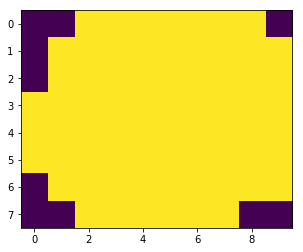

In [146]:
minPixelArea = np.min(areas)
test = np.where(shortMask3[minPixelArea] == 1)

xMax = np.max(test[0])
xMin = np.min(test[0])
yMax = np.max(test[1])
yMin = np.min(test[1])

neuron = shortMask3[minPixelArea][xMin:xMax+1, yMin:yMax+1]

plt.imshow(neuron)

<font size = '+2'>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
Will use (1) the smallest neuron as a median + convolution filter, (2) the square shape as a filter, (3) the circle shape as a filter/.
    <p>   </p>
    <p>   </p>
After each of these steps the image will be thresholded using the same pixel value cut-off.
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
</font>

<font size = '+2'>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
(1)
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
</font>

In [98]:
# Alll filters will be tested on imgs3 #3
filtered3 = signal.convolve2d(neuron,imgs3[3])

In [103]:
# here will try a median filter of only size 3
medianConv3 = signal.medfilt(filtered3, 7)

In [104]:
medianConv3Corrected = medianConv3[0:498,0:490] / np.max(medianConv3[0:498,0:490]) * 255

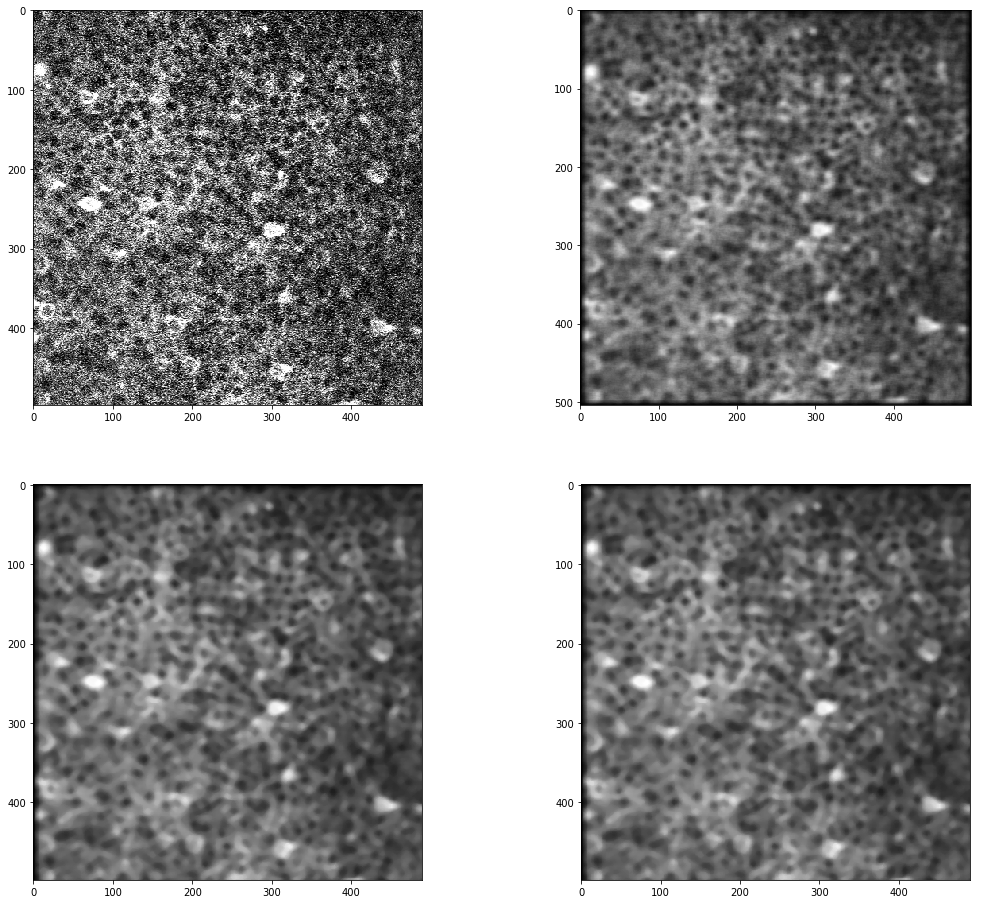

In [105]:
plt.figure(figsize=(18, 16))
plt.subplot(2, 2, 1)
plt.imshow(imgs3[3], cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(filtered3, cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(medianConv3[0:498,0:490], cmap='gray')
plt.subplot(2, 2, 4)
plt.imshow(medianConv3Corrected, cmap='gray')
plt.show()

<font size = '+2'>
This is thresholding on a processed image
</font>

In [106]:
thresholded = np.zeros((498,490))
                      
for row in range(0,498):
    for col in range(0,490):
        if medianConv3Corrected[row,col] >= 205:
            thresholded[row, col] = 255


<function matplotlib.pyplot.show(*args, **kw)>

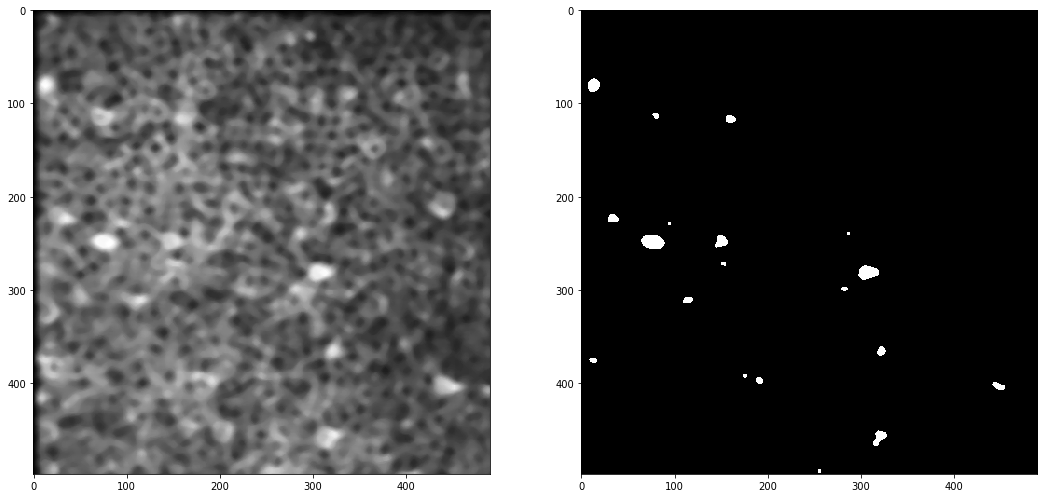

In [107]:
plt.figure(figsize=(18, 16))
plt.subplot(1, 2, 1)
plt.imshow(medianConv3Corrected, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(thresholded, cmap='gray')
plt.show



In [110]:
test = np.zeros((498,490))
maskIdx = 0
uniqueMaskIdx = []

for mask in shortMask3:
    for row in range(0,498):
        for col in range(0,490):
            if mask[row,col] != 0:
                if thresholded[row,col] != 0:
                    test[row,col] = 255;
                    if maskIdx not in uniqueMaskIdx:
                        uniqueMaskIdx.append(maskIdx)
    maskIdx = maskIdx + 1
    
uniqueMaskIdx = np.asarray(uniqueMaskIdx)

In [111]:
print(uniqueMaskIdx)

[ 12  32 110 175 199 274 297 394 410 488 558 579 604]


In [112]:
relevantSum = np.zeros((498,490))

for val in uniqueMaskIdx:
    relevantSum = relevantSum + shortMask3[val]

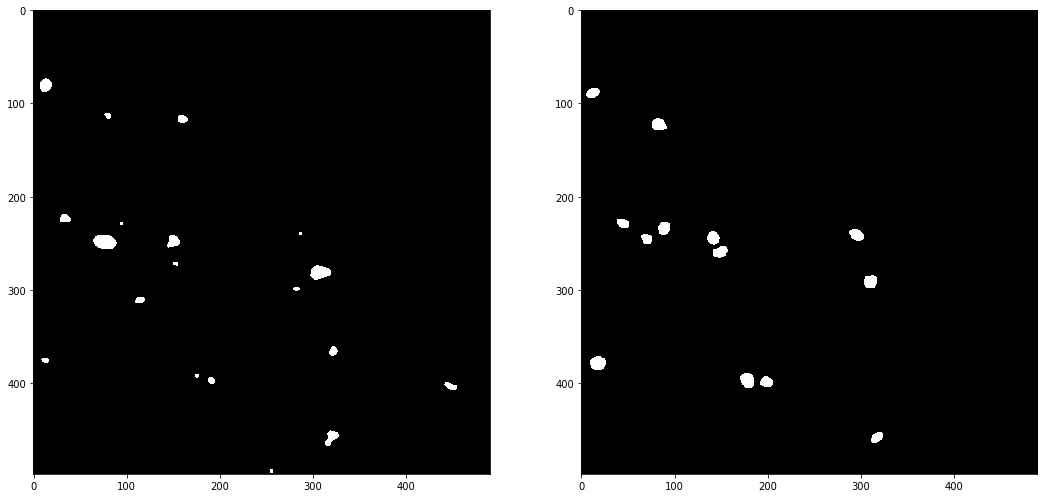

In [113]:
plt.figure(figsize=(18, 16))
plt.subplot(1, 2, 1)
plt.imshow(thresholded, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(relevantSum, cmap='gray')
plt.show()

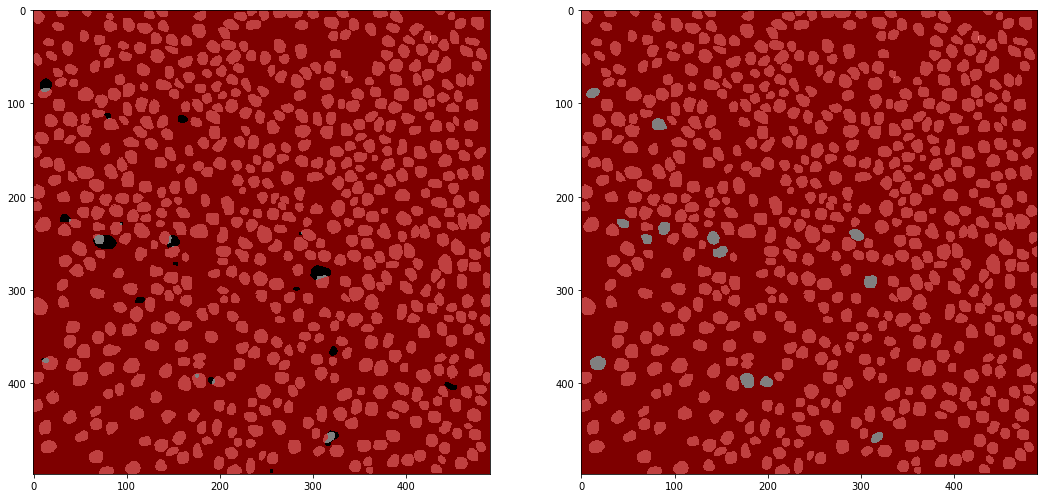

In [131]:
plt.figure(figsize=(18, 16))
plt.subplot(1, 2, 1)
plt.imshow(maskSummation, cmap = 'gray')
Img2 = np.ma.masked_array(thresholded == 0, thresholded)
plt.imshow(Img2, cmap = 'hsv',alpha = .5)
plt.subplot(1, 2, 2)
plt.imshow(maskSummation, cmap = 'gray')
Img3 = np.ma.masked_array(relevantSum == 0, relevantSum)
plt.imshow(Img3, cmap = 'hsv',alpha = .5)
plt.show()

In [101]:
# from scipy.ndimage import measurements

# lw, num = measurements.label(relevantSum)
# area = measurements.sum(relevantSum, lw, index=range(lw.max() + 1))
# print(area)

# lw1, num1 = measurements.label(thresholded)
# area1 = measurements.sum(thresholded, lw1, index=range(lw1.max() + 1))
# print(area1)


[  0. 124. 117. 146. 114. 125. 167. 149. 159. 140.  82. 197. 212. 162.
 109. 134. 255. 166. 157. 106. 153. 174. 162. 164. 125. 207. 188. 134.
 109.  96. 120. 159.  90. 120. 136.]
[    0.  5100.   765.   765. 49470.   510.   765.   255.  8925.   765.
  1530.  2550.  4590.  1530.  1020. 41565. 22185.  1530.  7140.  1530.
   510.   510.  2040.  1275.  4845.  2805.  1020.  1275.  4080.   510.
  4590.  1530.  4080.   765.  7395.  1530.   510.   510.  3060.  2295.
   765.  1530.  2040.  4335.  2550.   510.   510.  1275.  1020.  1275.
   510.   510.  2550.  1020. 10710.   765.  2295. 15555. 33660.  3315.
  2040.   765.  3060. 15555.   765.   510. 11730. 17085. 54060.   765.
 94605.   510.   510.  1275.  1020.  2550.  6120.  1020. 17595. 85170.
   255.  2040.   255. 13005.   765. 22440.  2295.  1530.  1275.  1785.
  5355.  1020.   765.   255. 25245.   510.   510.  4335.  2295.   255.
  2550.  9945.   510.   510.   510. 31875. 42840.  6885.  1275.  1275.
   765. 45135.  3825.   255.  1275.  102

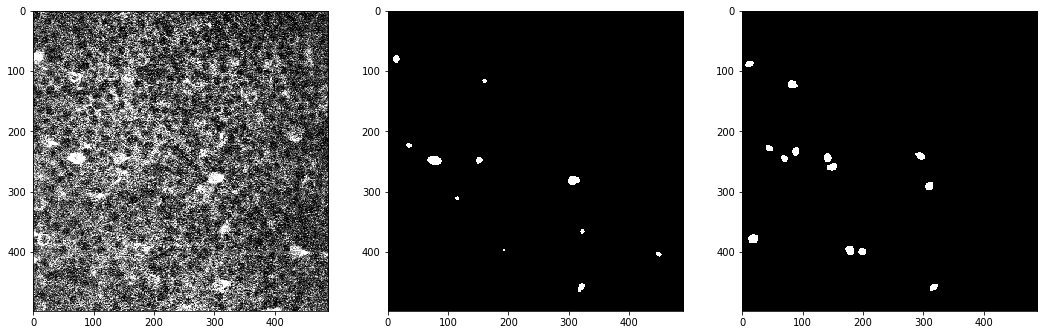

In [114]:
thresholdedMed15 = signal.medfilt(thresholded, 9)
plt.figure(figsize=(18, 16))
plt.subplot(1,3,1)
plt.imshow(imgs3[3], cmap = 'gray')
plt.subplot(1,3,2)
plt.imshow(thresholdedMed15, cmap = 'gray')
plt.subplot(1,3,3)
plt.imshow(relevantSum, cmap = 'gray')
plt.show()

In [115]:
finalMaskIdx = []
maskIdx = 0

for mask in shortMask3:
    for row in range(0,498):
        for col in range(0,490):
            if mask[row,col] != 0:
                if thresholdedMed15[row,col] != 0:
                    if maskIdx not in finalMaskIdx:
                        finalMaskIdx.append(maskIdx)
    maskIdx = maskIdx + 1
    
finalMaskIdx = np.asarray(finalMaskIdx)
print(finalMaskIdx)

finalMask = np.zeros((498,490))
for val in finalMaskIdx:
    finalMask = finalMask + shortMask3[val]

[ 32 175 274 297 410 558 579]


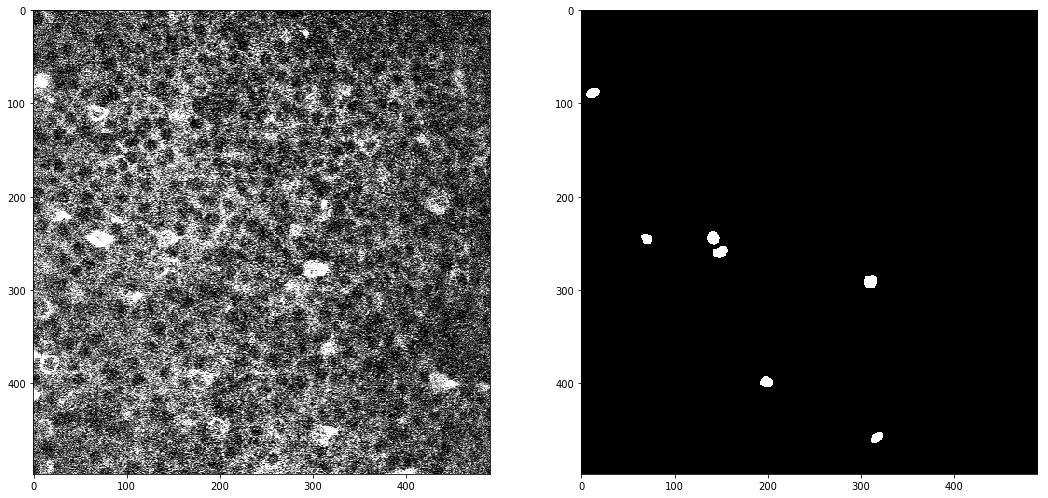

In [116]:
plt.figure(figsize=(18, 16))
plt.subplot(1,2,1)
plt.imshow(imgs3[3], cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(finalMask, cmap = 'gray')
plt.show()

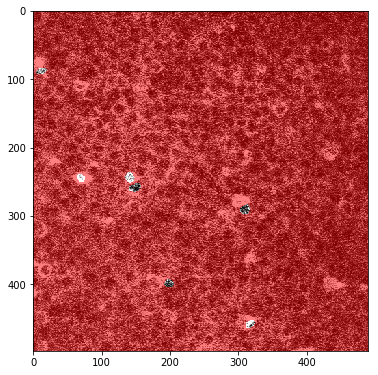

In [122]:
plt.figure(figsize=(6, 16))
plt.imshow(imgs3[3], cmap = 'gray')
Img2 = np.ma.masked_array(finalMask == 0, finalMask)
plt.imshow(Img2, cmap = 'hsv', alpha = .5)
plt.show()

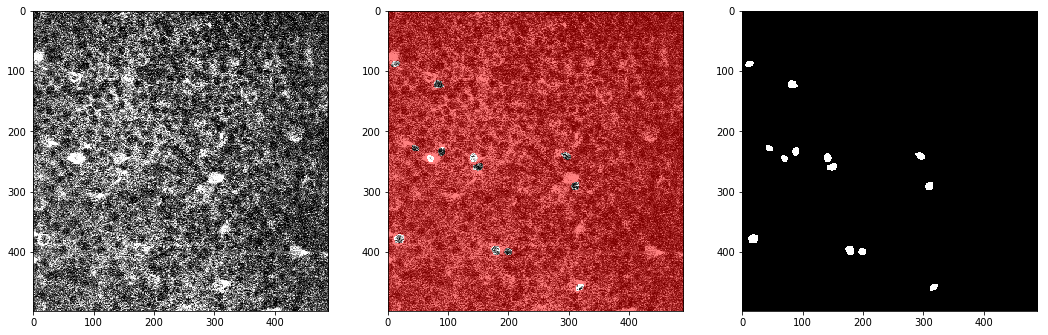

In [125]:
plt.figure(figsize=(18, 16))
plt.subplot(1,3,1)
plt.imshow(imgs3[3], cmap = 'gray')
plt.subplot(1,3,2)
plt.imshow(imgs3[3], cmap = 'gray')
Img2 = np.ma.masked_array(relevantSum == 0, relevantSum)
plt.imshow(Img2, cmap = 'hsv', alpha = .5)
plt.subplot(1,3,3)
plt.imshow(relevantSum, cmap = 'gray')
plt.show()

<font size = '+2'>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
Taking traces.
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
    <p>   </p>
</font>

In [170]:
# get the total areas for all of the masks

areas = []
for mask in shortMask3:
    unique, counts = np.unique(mask, return_counts=True)
    areas.append(counts[-1])
areas = np.asarray(areas)

In [212]:
# normalize the true image values to be 0-255

imgs3Corrected = np.zeros([imgs3.shape[0],imgs3.shape[1],imgs3.shape[2]])

idx = 0
for img in imgs3:
    imgs3Corrected[idx,:,:] = imgs3[idx,:,:]/ np.max(imgs3[idx,:,:]) * 255
    idx = idx + 1

In [ ]:
maskIdx = 0
maskSummation = np.zeros([621,498])

for mask in shortMask3: 
    test = np.where(shortMask3[maskIdx] == 1)

    xMax = np.max(test[0])
    xMin = np.min(test[0])

    yMax = np.max(test[1])
    yMin = np.min(test[1])

    neuron = shortMask3[maskIdx][xMin:xMax+1, yMin:yMax+1]
    plt.imshow(neuron)

In [220]:
print(imgs3Corrected.shape)
print(shortMask3.shape)


(2250, 498, 490)
(621,)


In [226]:
totNumNeuroshortMask3.shape[0]

621

In [265]:
maskIdx = 0
# is 621 neurons by 2250 time points in the series
maskMedian = np.zeros([shortMask3.shape[0],imgs3Corrected.shape[0]])

for mask in shortMask3:
    timeIdx = 0
    test = np.where(shortMask3[maskIdx] == 1)
    xMax = np.max(test[0])
    xMin = np.min(test[0])
    yMax = np.max(test[1])
    yMin = np.min(test[1])
    neuron = shortMask3[maskIdx][xMin:xMax+1, yMin:yMax+1]
#     plt.figure()
#     plt.imshow(neuron)
#     plt.show()
    
    for img in imgs3Corrected:
        temp = img[xMin:xMax+1, yMin:yMax+1] * neuron
        median = np.median(temp)
        maskMedian[maskIdx,timeIdx] = median
        timeIdx = timeIdx + 1;
        
    maskIdx = maskIdx + 1

#     if maskIdx > 5:
#         break

In [266]:
print(maskMedian.shape)

(621, 2250)


In [271]:
np.mean(maskMedian[1,:])

21.942355837708053

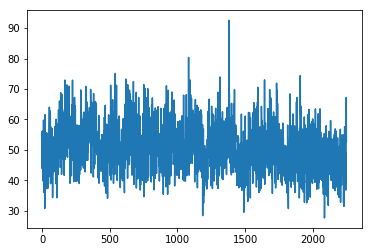

In [306]:
plt.plot(maskMedian[0,:])

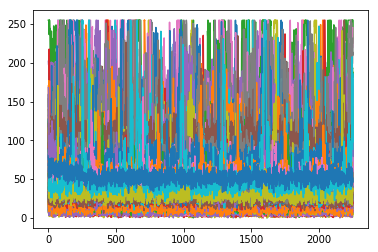

In [273]:
for i in range(0, maskMedian.shape[0]):
    plt.plot(maskMedian[i,:])

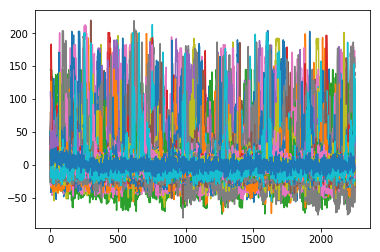

In [275]:
for i in range(0, maskMedian.shape[0]):
    plt.plot(maskMedian[i,:] - np.mean(maskMedian[i,:]))

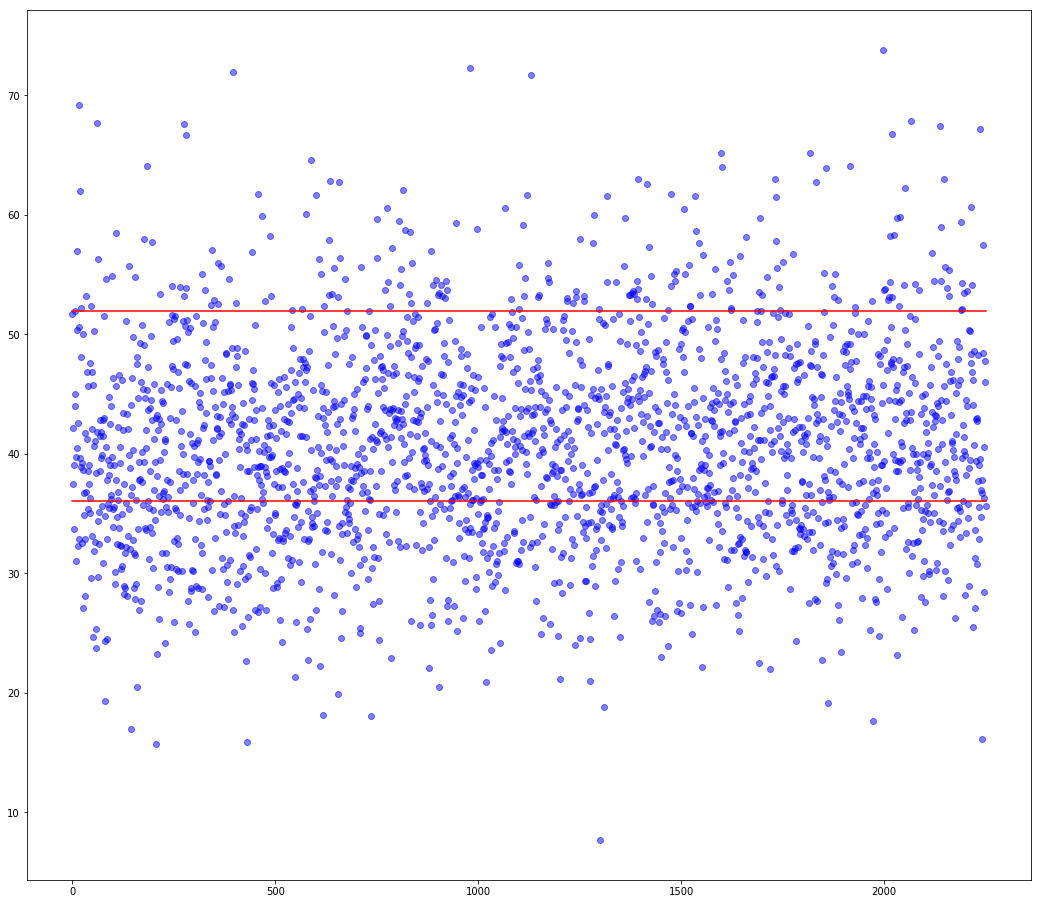

In [303]:
neuronNum = 500;
xAxis = np.linspace(0,maskMedian.shape[1],maskMedian.shape[1])
plt.figure(figsize=(18,16))
plt.scatter(xAxis,maskMedian[neuronNum,:], color='blue',alpha=.5)
plt.plot([0, 2250], [np.percentile(maskMedian[neuronNum,:],90), np.percentile(maskMedian[neuronNum,:],90)], color='red')
plt.plot([0, 2250], [np.percentile(maskMedian[neuronNum,:],30), np.percentile(maskMedian[neuronNum,:],30)], color='red')



In [277]:
np.percentile(maskMedian[90,:],90)

15.814918813331705

In [304]:
np.percentile(maskMedian[90,:],25)

10.195641557807349

In [ ]:
for mask in shortMask3:
    if np.median(mask) > np.percentile(maskMedian[neuronNum,:],90)